In [3]:
library(RColorBrewer)

library(destiny)

palette(brewer.pal(6, 'Spectral'))

options(device = function(...) png('/dev/null', ...))
options(repr.plot.width = 7, repr.plot.height = 6)
options(jupyter.plot_mimetypes = c('application/pdf', 'image/png'))

Quickstart
=====

A short version to achive the above is by using the preprocessed version of the dataset provided with this package. `data(guo)` is already preprocessed (using the method first mentioned), has its threshold set to a constant 15 and is ready to use. Since the platform’s maximum amplification cycles are 40, that number can be used as upper border of the uncertainty range.

In [52]:
library(destiny)
data(guo)

The “divisions” column is an annotation that will be automatically excluded later:

In [53]:
colnames(guo)[!sapply(guo, is.double)]

[1] "divisions"

It can be used directly for $\sigma$ estimation:

In [54]:
sigmas <- find.sigmas(guo, verbose = FALSE,
                      censor.val = 15, uncertainty = c(15, 40))
sigmas

An object of class "Sigmas"
Slot "log.sigmas":
[1] 0.8648626 0.9648626 1.0648626 1.1648626 1.2648626

Slot "dim.norms":
[1] 8.037462 8.049125 8.765278 8.523227

Slot "best.sigma":
[1] 13.02754

Slot "best.idx":
[1] 3

Slot "avrd.norms":
[1] -6.460327 -5.656581 -4.851669 -3.975141 -3.122818


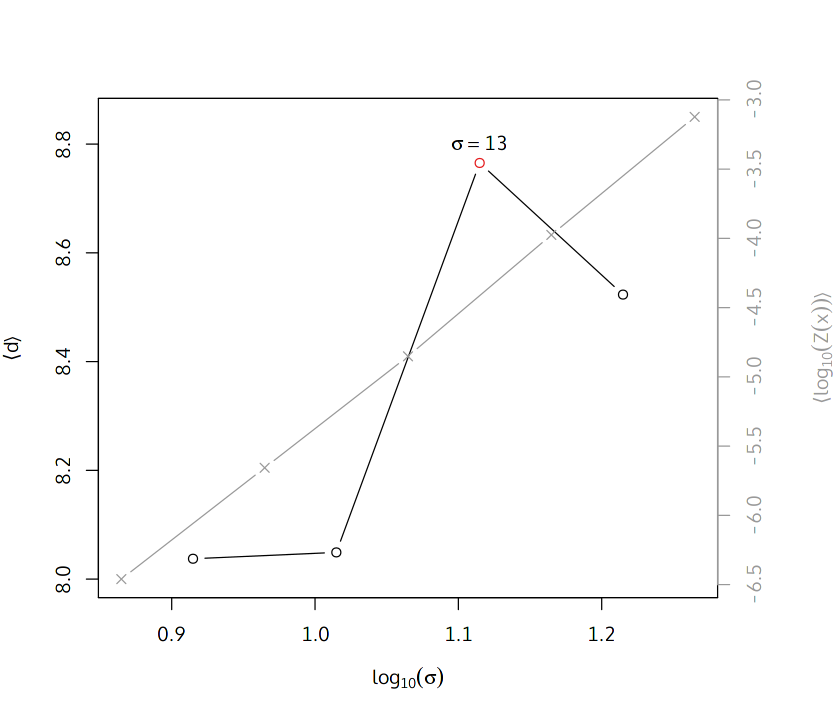

In [55]:
plot(sigmas)

And can also be used directly for diffusion map creation:

In [56]:
guo.dif <- DiffusionMap(guo, sigmas@best.sigma, verbose = FALSE,
                        censor.val = 15, uncertainty = c(15, 40))
str(guo.dif)

Formal class 'DiffusionMap' [package "destiny"] with 2 slots
  ..@ values : num [1:20] 0.988 0.959 0.943 0.862 0.713 ...
  ..@ vectors: num [1:429, 1:20] -0.00472 -0.00469 -0.00434 -0.00464 -0.00496 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : NULL
  .. .. ..$ : chr [1:20] "DC1" "DC2" "DC3" "DC4" ...


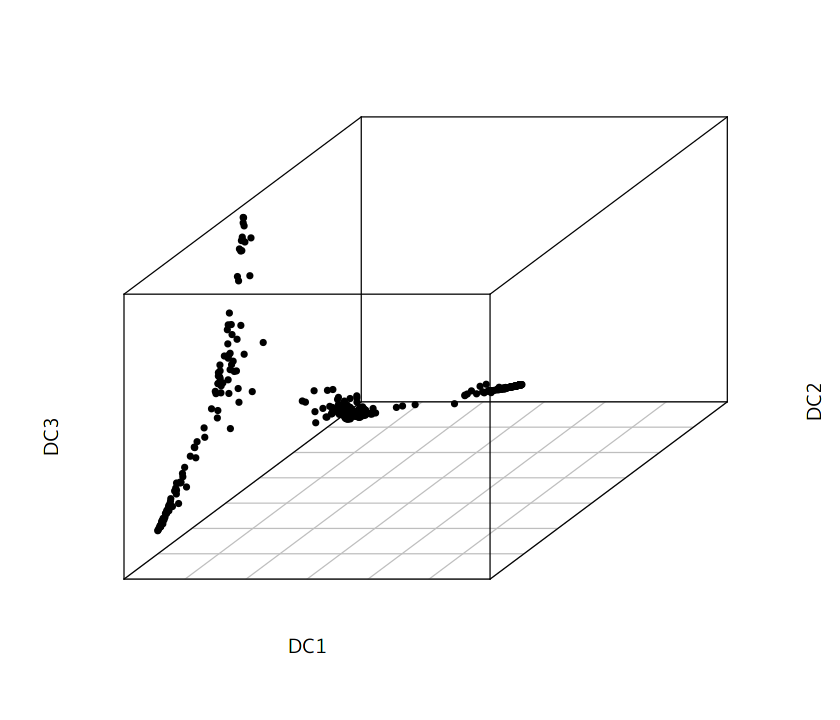

In [57]:
par(pch = 20)  # prettier points
plot(guo.dif)

using the annotation shows that the approximation worked

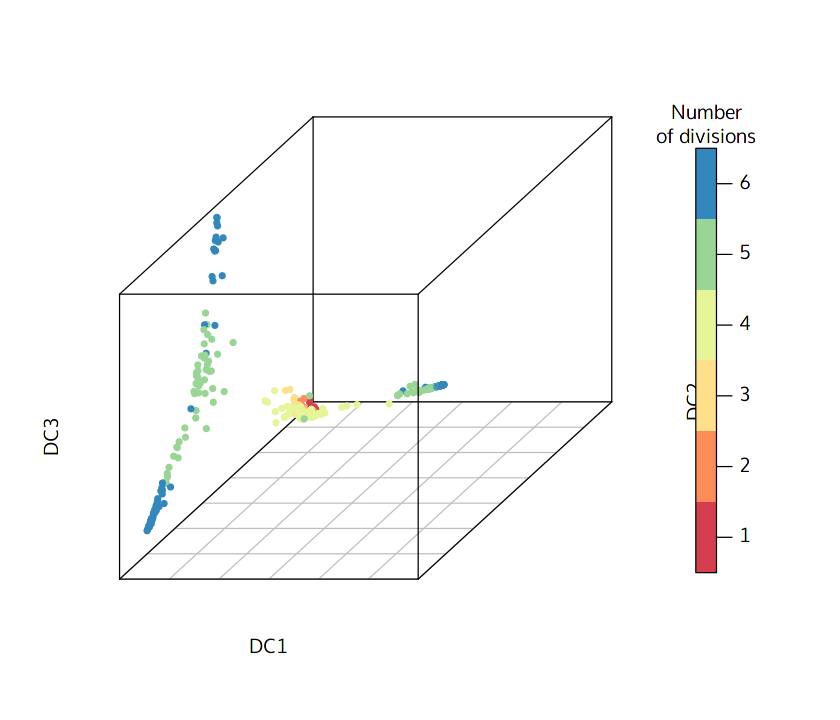

In [58]:
par(pch = 20)

plot(guo.dif, col = guo$divisions, legend.main = 'Number\nof divisions')